# Logistic Regression with non-linear features

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [2]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train          = np.genfromtxt(fname_data_train, delimiter=',')
data_test           = np.genfromtxt(fname_data_test, delimiter=',')

number_data_train   = data_train.shape[0]
number_data_test    = data_test.shape[0]

data_train_point    = data_train[:, 0:2]
data_train_point_x  = data_train_point[:, 0]
data_train_point_y  = data_train_point[:, 1]
data_train_label    = data_train[:, 2]

data_test_point     = data_test[:, 0:2]
data_test_point_x   = data_test_point[:, 0]
data_test_point_y   = data_test_point[:, 1]
data_test_label     = data_test[:, 2]

data_train_label_class_0    = (data_train_label == 0)
data_train_label_class_1    = (data_train_label == 1)

data_test_label_class_0     = (data_test_label == 0)
data_test_label_class_1     = (data_test_label == 1)

data_train_point_x_class_0  = data_train_point_x[data_train_label_class_0]
data_train_point_y_class_0  = data_train_point_y[data_train_label_class_0]

data_train_point_x_class_1  = data_train_point_x[data_train_label_class_1]
data_train_point_y_class_1  = data_train_point_y[data_train_label_class_1]

data_test_point_x_class_0   = data_test_point_x[data_test_label_class_0]
data_test_point_y_class_0   = data_test_point_y[data_test_label_class_0]

data_test_point_x_class_1   = data_test_point_x[data_test_label_class_1]
data_test_point_y_class_1   = data_test_point_y[data_test_label_class_1]

print('shape of point in train data = ', data_train_point.shape)
print('shape of point in test data = ', data_train_point.shape)

print('shape of label in train data = ', data_test_label.shape)
print('shape of label in test data = ', data_test_label.shape)

print('data type of point x in train data = ', data_train_point_x.dtype)
print('data type of point y in train data = ', data_train_point_y.dtype)

print('data type of point x in test data = ', data_test_point_x.dtype)
print('data type of point y in test data = ', data_test_point_y.dtype)


shape of point in train data =  (500, 2)
shape of point in test data =  (500, 2)
shape of label in train data =  (500,)
shape of label in test data =  (500,)
data type of point x in train data =  float64
data type of point y in train data =  float64
data type of point x in test data =  float64
data type of point y in test data =  float64


## plot the data

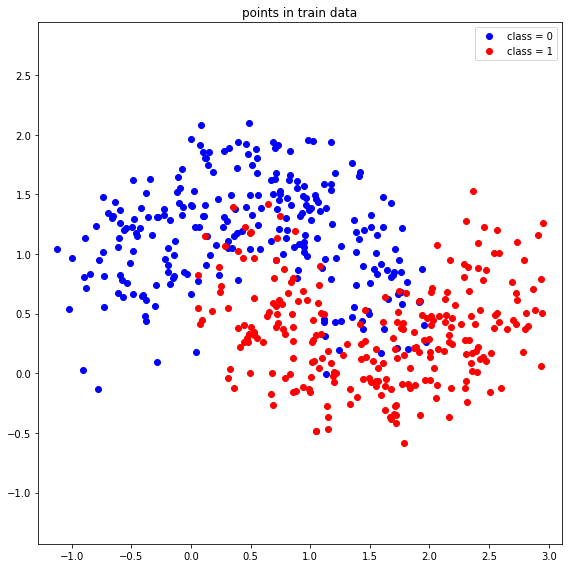

In [3]:
f = plt.figure(figsize=(8,8))   

plt.title('points in train data')
plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

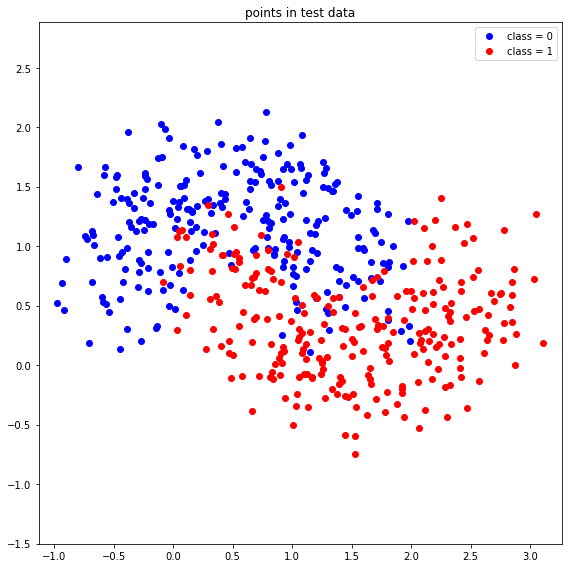

In [4]:
f = plt.figure(figsize=(8,8))   

plt.title('points in test data')
plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [5]:
def compute_feature(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    len_point = len(point)
    x= point[:, 0]
    
    y = point[:, 1]
    
   


    feature = np.ones((point.shape[0],15))
    feature[:,0] = 1
    feature[:,1]=x
    feature[:,2]=pow(x,2)
    feature[:,3] = pow(x,3)
    feature[:,4]=pow(x,4)
    feature[:,5]=pow(x,5)
    feature[:,6]=pow(x,6)
    feature[:,7]=pow(x,7)
    feature[:,8]=pow(x,8)
    feature[:,9]=pow(x,9)
    feature[:,10]=pow(x,10)
    feature[:,11]=pow(x,11)
    feature[:,12]=pow(x,12)
    feature[:,13]=y*1.5
    feature[:,14]=pow(y,2)*np.sin(x/6)
    
    
    
    
    #feature = (np.ones(len(point)) , x , np.power(x,2) , np.power(x,3),np.power(x,4),np.power(x,5),y,np.power(y,2),np.power(y,3),np.power(y,4),np.power(y,5))
    #feature = np.array(feature)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature #np.array(feature).shape
#print(compute_feature(data_train_point))

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [6]:
def compute_linear_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = np.dot(feature,theta)
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return value
#print(compute_linear_regression((0,0,0,1,0,0,0,0,0,0,0,0,0),compute_feature(data_train_point)))

## define sigmoid function with input

- $z \in \mathbb{R}$

In [7]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = 1/(1+np.exp(-z))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [8]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = sigmoid(compute_linear_regression(theta, feature))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value
#print(compute_logistic_regression((0,0,0,1,0,0,0,0,0,0,0,0,0),compute_feature(data_train_point)))

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [9]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    residual = -label*np.log(compute_logistic_regression(theta,feature))-(1-label)*np.log(1-compute_logistic_regression(theta,feature))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual
#print(compute_residual((0,0,0,1,0,0,0,0,0,0,0,0,0),compute_feature(data_train_point),data_train_label))

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [10]:
def compute_loss(theta, feature, label, alpha):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    loss = np.mean(-label*np.log(compute_logistic_regression(theta,feature)-(1-label)*np.log(1-compute_logistic_regression(theta,feature))))
   
    #sum=0
    #for i in range(len(theta)):
        #sum+=abs(theta[i]*theta[i])
    theta = np.array(theta)
    sum=np.matmul(theta.T,theta)
    
    loss = loss +sum*(alpha/2)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss
#print(compute_loss((0,0,0,1,0,0,0,0,0,0,0,0,0),compute_feature(data_train_point),data_train_label,10))

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [11]:
def compute_gradient(theta, feature, label, alpha):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # x= feature[:, 0]
    # for i in range(1,len(label)):
    #     y = feature[:, i]
    #     x = np.vstack([x,y])
    # k = np.dot(x.T,x)
    
    # k1= k +(alpha/2)*np.identity(len(feature))
    # k2 = k1.astype(float)
    # t1 = np.linalg.inv(k2)
    # t2=np.dot(t1,x.T)
    # t3 = t2@label

    k=(feature.T@feature+(alpha)*np.identity(len(theta)))
    k1=np.linalg.inv(k)
    t=feature.T@label

    gradient = k1@t
    


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient
#print(compute_gradient((0,0,0,1,0,0,0,0,0,0,0,0,0),compute_feature(data_train_point),data_train_label,10))

## compute the accuracy of the prediction for point with a given model parameter

In [12]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    t=compute_logistic_regression(theta, feature)
    count = 0
    lenz = len(label)
    for i in range(lenz):
        if t[i] <0.5:
            discrimination = 1
        else:
            discrimination =0
        if label[i] == discrimination:
            count +=1
        #print(t[i])
    accuracy = (count/lenz)
    #print("평균%f",np.mean(t))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy
#print(compute_accuracy((1,0,0,0,0,0,0,0,0,0,0,0,0),compute_feature(data_train_point),data_train_label))

## initialize the gradient descent algorithm

In [13]:
number_iteration    = 1216#776#776#392 # you can change this value as you want 
learning_rate       = 0.00125 # 0.005you can change this value as you want 
number_feature      = 15 # you can change this value as you want
alpha               = 0.00000025#10 #10 you can change this value as you want

theta                       = np.zeros(number_feature)
loss_iteration_train        = np.zeros(number_iteration)
loss_iteration_test         = np.zeros(number_iteration)
accuracy_iteration_train    = np.zeros(number_iteration)
accuracy_iteration_test     = np.zeros(number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [14]:
for i in range(number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    if i==0:
        theta = (0.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
    #[-0.51618197 -1.27355626  0.03527617  1.36206183  0.32828563 -0.73349904 -0.10682229  0.19944078 -0.03682302  1.01979135]
    feature1 = compute_feature(data_train_point)# train
    feature2 = compute_feature(data_test_point)# test
    loss_train2=compute_loss(theta,feature1,data_train_label,alpha)/(i*0.20+1)
    loss_test2 = compute_loss(theta,feature2,data_test_label,alpha)/(i*0.20+1)
    theta           = theta-learning_rate*compute_gradient(theta,feature1,data_train_label,alpha)
    loss_train      = loss_train2
    loss_test       =loss_test2
    accuracy_train  = compute_accuracy(theta,feature1,data_train_label)
    accuracy_test   = compute_accuracy(theta,feature2,data_test_label)
    if accuracy_train ==0.918:
        print(i)
    if accuracy_test ==0.908:
        print(i)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    loss_iteration_train[i]     = loss_train
    loss_iteration_test[i]      = loss_test
    accuracy_iteration_train[i] = accuracy_train
    accuracy_iteration_test[i]  = accuracy_test

theta_optimal = theta
print(max(accuracy_iteration_train))
print(max(accuracy_iteration_test))
#print(theta_optimal)
#print("test loss%f",loss_iteration_test[number_iteration-1])
#print("train loss%f",loss_iteration_train[number_iteration-1])

1191
1192
1193
1194
0.918
0.906


___

___

## functions for presenting the results

___

___

In [15]:
def function_result_01():

    print("final training accuracy = {:13.10f}".format(accuracy_iteration_train[-1]))

In [16]:
def function_result_02():

    print("final testing accuracy = {:13.10f}".format(accuracy_iteration_test[-1]))

In [17]:
def function_result_03():
    
    plt.figure(figsize=(8,6))
    plt.title('training loss')

    plt.plot(loss_iteration_train, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [18]:
def function_result_04():

    plt.figure(figsize=(8,6))
    plt.title('testing loss')

    plt.plot(loss_iteration_test, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [19]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('training accuracy')

    plt.plot(accuracy_iteration_train, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [20]:
def function_result_06():
    
    plt.figure(figsize=(8,6))
    plt.title('testing accuracy')

    plt.plot(accuracy_iteration_test, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [21]:
def function_result_07():

    plt.figure(figsize=(8,8)) 
    plt.title('linear regression values on the training data')
    
    min_x   = np.min(data_train_point_x)
    max_x   = np.max(data_train_point_x)
    min_y   = np.min(data_train_point_y)
    max_y   = np.max(data_train_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    XXX = XX.reshape((-1,1))
    
    XY =np.array([XX.flatten(),YY.flatten()]).T
    new=compute_feature(XY)
    ones =np.ones([len(X)*len(Y)])
    zmesh = compute_linear_regression(theta,new).reshape(XX.shape)
    plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, 'o',markersize=1, color='blue', label='class = 0')
    plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, 'o',markersize=1, color='red', label='class = 1')
    plt.contour(XX,YY,zmesh, levels =15000 , cmap ="RdBu_r")
    plt.contour(XX,YY,zmesh,levels = 1 , colors='black')
    


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [22]:
def function_result_08():
    
    plt.figure(figsize=(8,8)) 
    plt.title('linear regression values on the testing data')
    
    min_x   = np.min(data_test_point_x)
    max_x   = np.max(data_test_point_x)
    min_y   = np.min(data_test_point_y)
    max_y   = np.max(data_test_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1)
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    XXX = XX.reshape((-1,1))
    
    XY =np.array([XX.flatten(),YY.flatten()]).T
    new=compute_feature(XY)
    ones =np.ones([len(X)*len(Y)])
    zmesh = compute_linear_regression(theta,new).reshape(XX.shape)
    plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, 'o',markersize=1, color='blue', label='class = 0')
    plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, 'o',markersize=1, color='red', label='class = 1')
    plt.contour(XX,YY,zmesh, levels =15000 , cmap ="RdBu_r")
    plt.contour(XX,YY,zmesh,levels = 1 , colors='black')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

## plot the logistic regression values over the 2-dimensional Euclidean space

In [23]:
def function_result_09():

    plt.figure(figsize=(8,8)) 
    plt.title('logistic regression values on the training data')
    
    min_x   = np.min(data_train_point_x)
    max_x   = np.max(data_train_point_x)
    min_y   = np.min(data_train_point_y)
    max_y   = np.max(data_train_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    XXX = XX.reshape((-1,1))
    
    XY =np.array([XX.flatten(),YY.flatten()]).T
    new=compute_feature(XY)
    ones =np.ones([len(X)*len(Y)])
    zmesh = compute_logistic_regression(theta,new).reshape(XX.shape)
    plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, 'o',markersize=1, color='blue', label='class = 0')
    plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, 'o',markersize=1, color='red', label='class = 1')
    plt.contour(XX,YY,zmesh, levels =2000 , cmap ="RdBu_r")
    plt.contour(XX,YY,zmesh,levels = 1 , colors='black')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++


    plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [24]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) 
    plt.title('logistic regression values on the testing data')

    min_x   = np.min(data_test_point_x)
    max_x   = np.max(data_test_point_x)
    min_y   = np.min(data_test_point_y)
    max_y   = np.max(data_test_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    XXX = XX.reshape((-1,1))
    
    XY =np.array([XX.flatten(),YY.flatten()]).T
    new=compute_feature(XY)
    ones =np.ones([len(X)*len(Y)])
    zmesh = compute_logistic_regression(theta,new).reshape(XX.shape)
    plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, 'o',markersize=1, color='blue', label='class = 0')
    plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, 'o',markersize=1, color='red', label='class = 1')
    plt.contour(XX,YY,zmesh, levels =2000 , cmap ="RdBu_r")
    plt.contour(XX,YY,zmesh,levels = 1 , colors='black')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++


    plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
final training accuracy =  0.9160000000
**************************************************
## [RESULT 02]
**************************************************
final testing accuracy =  0.9000000000
**************************************************
## [RESULT 03]
**************************************************


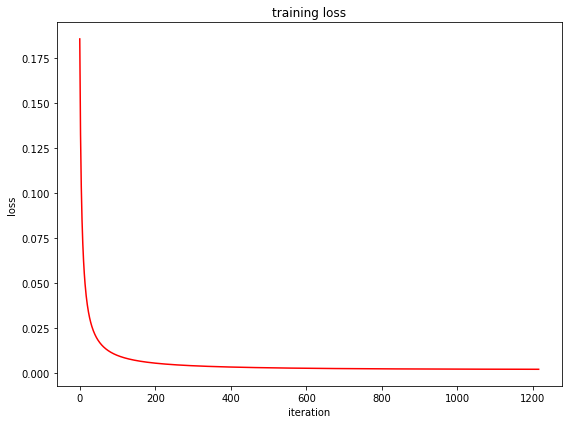

**************************************************
## [RESULT 04]
**************************************************


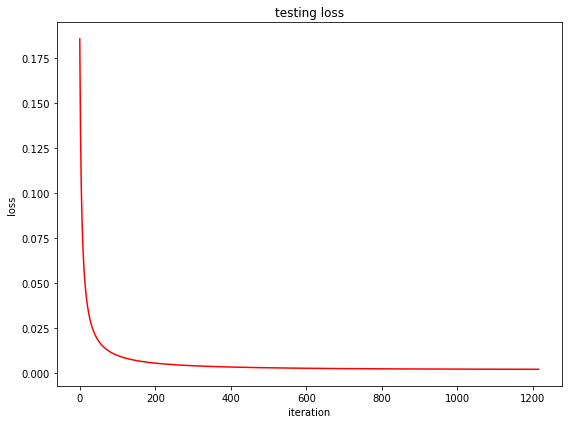

**************************************************
## [RESULT 05]
**************************************************


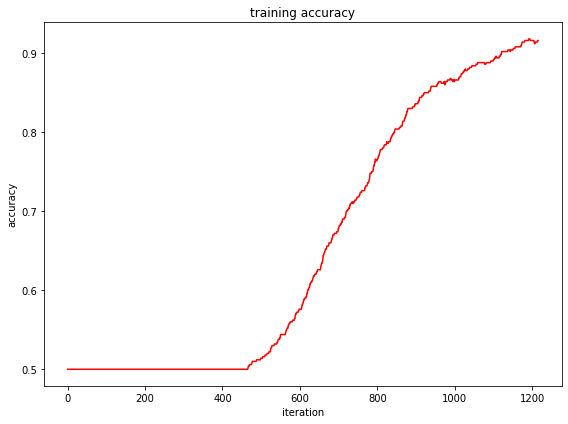

**************************************************
## [RESULT 06]
**************************************************


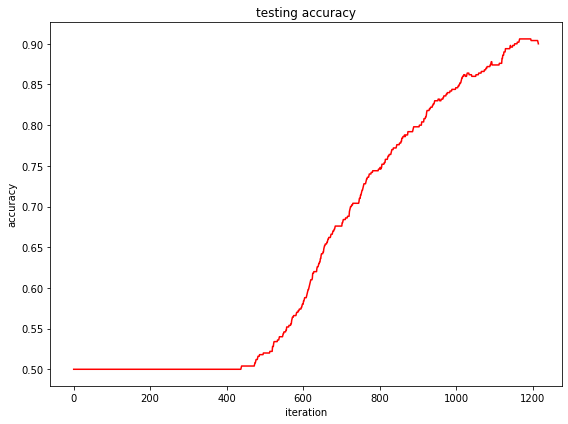

**************************************************
## [RESULT 07]
**************************************************


Locator attempting to generate 13145 ticks ([-70.734, ..., 8.13000000000001]), which exceeds Locator.MAXTICKS (1000).


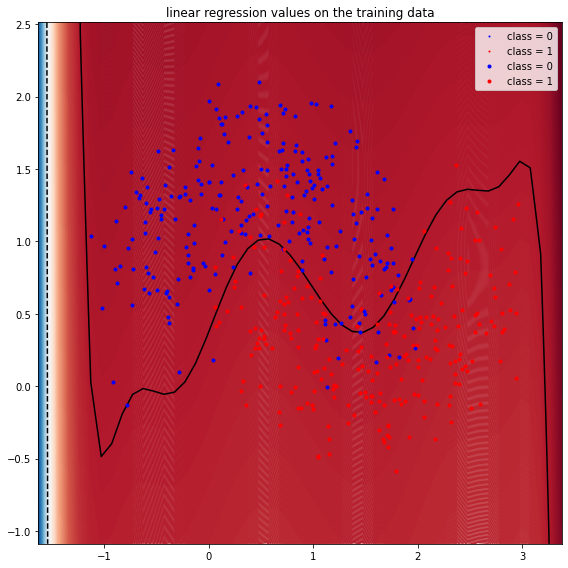

Locator attempting to generate 12751 ticks ([-25.556, ..., 25.444]), which exceeds Locator.MAXTICKS (1000).


**************************************************
## [RESULT 08]
**************************************************


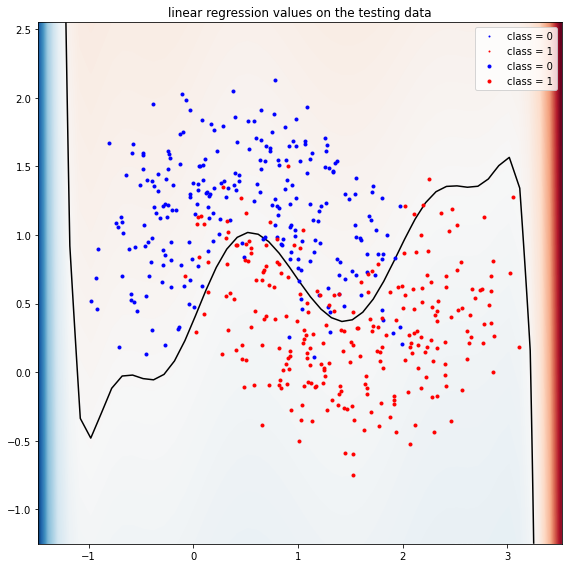

Locator attempting to generate 2001 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).


**************************************************
## [RESULT 09]
**************************************************


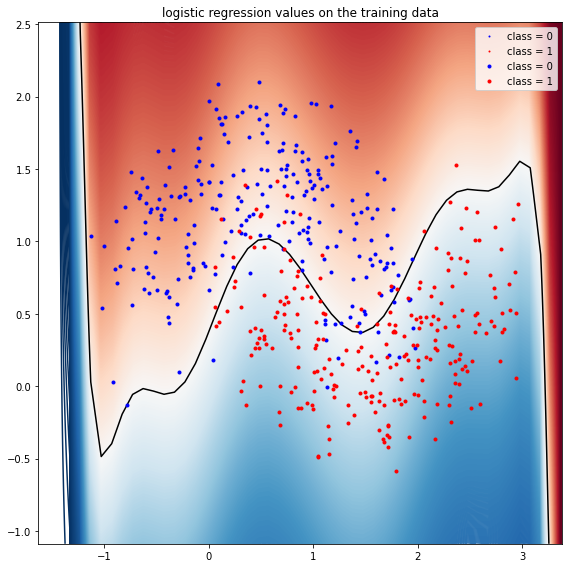

Locator attempting to generate 2001 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).


**************************************************
## [RESULT 10]
**************************************************


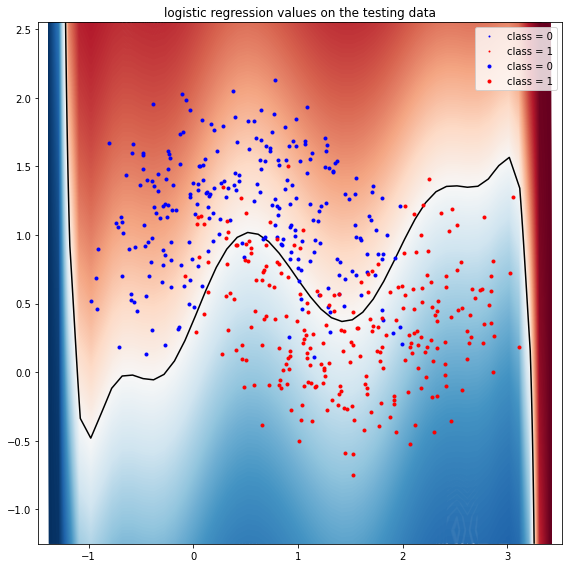

In [25]:
number_result = 10

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)